In [19]:
import pandas as pd
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
%matplotlib inline
     

In [2]:
df=pd.read_csv('/content/Generated_Ion_Exchange.csv')

In [3]:
df2=df[['DATE', 'Time', 'Permeate flow']].copy()
df3=df[['DATE', 'Time', 'Salt Rejection']].copy()
df4=df[['DATE', 'Time', 'DP']].copy()

In [4]:
df2.dropna(how="any",inplace=True)
df3.dropna(how="any",inplace=True)
df4.dropna(how="any",inplace=True)

In [5]:
df2['Time'] = df2['Time'].apply(lambda x: x.strip())
df3['Time'] = df3['Time'].apply(lambda x: x.strip())
df4['Time'] = df4['Time'].apply(lambda x: x.strip())

In [6]:

df2['Time'] = df2['Time'].apply(lambda x: ":".join(x.split(".")))
df2['DATE'] = df2['DATE'].apply(lambda x: x.split('.')[-1] + "-" + x.split('.')[-2] + "-" + x.split('.')[-3])
df2['Datetime'] = pd.to_datetime(df2['DATE'] + " " + df2['Time'])
df2.set_index('Datetime', inplace=True)


df3['Time'] = df3['Time'].apply(lambda x: ":".join(x.split(".")))
df3['DATE'] = df3['DATE'].apply(lambda x: x.split('.')[-1] + "-" + x.split('.')[-2] + "-" + x.split('.')[-3])
df3['Datetime'] = pd.to_datetime(df3['DATE'] + " " + df3['Time'])
df3.set_index('Datetime', inplace=True)


df4['Time'] = df4['Time'].apply(lambda x: ":".join(x.split(".")))
df4['DATE'] = df4['DATE'].apply(lambda x: x.split('.')[-1] + "-" + x.split('.')[-2] + "-" + x.split('.')[-3])
df4['Datetime'] = pd.to_datetime(df4['DATE'] + " " + df4['Time'])
df4.set_index('Datetime', inplace=True)

Permeate Flow Original Plot

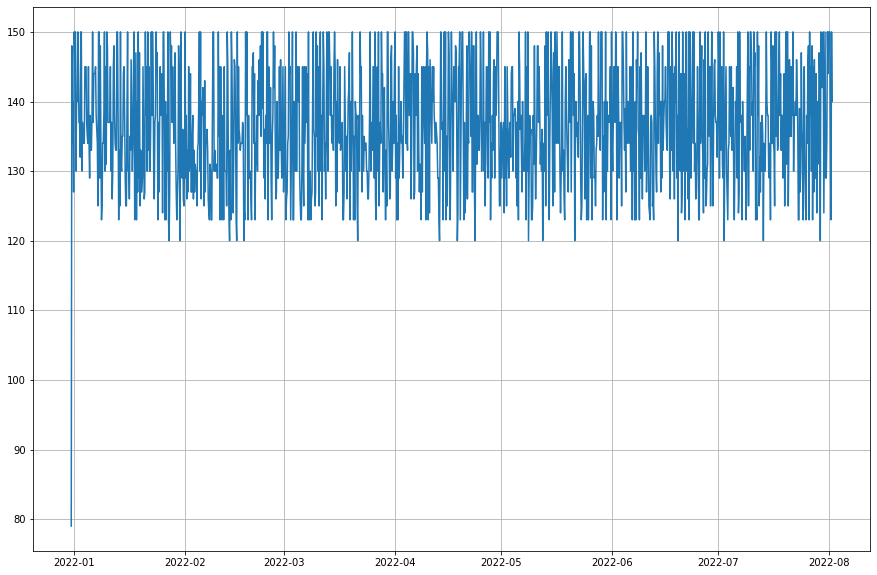

In [7]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df2['Permeate flow'])

Salt Rejection Original Plot

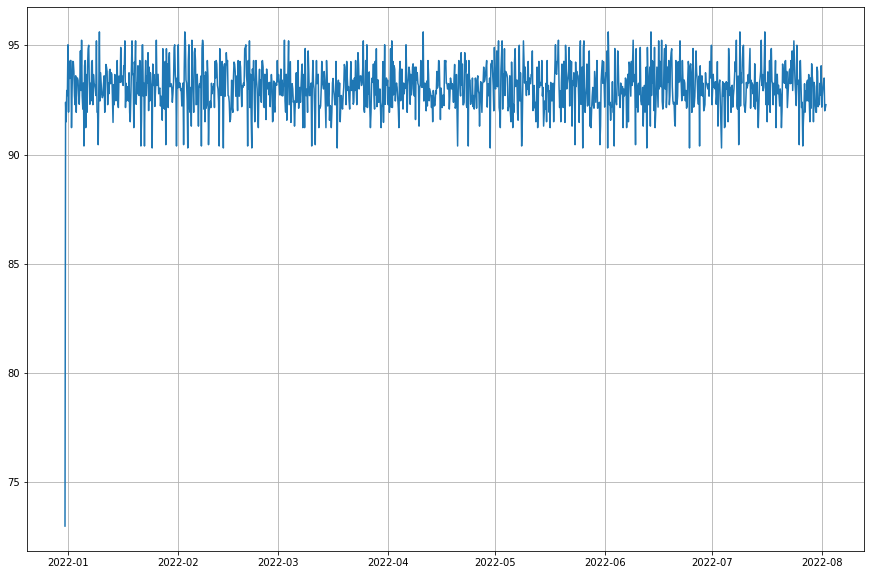

In [9]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df3[ 'Salt Rejection'])

"DP" Original Plot

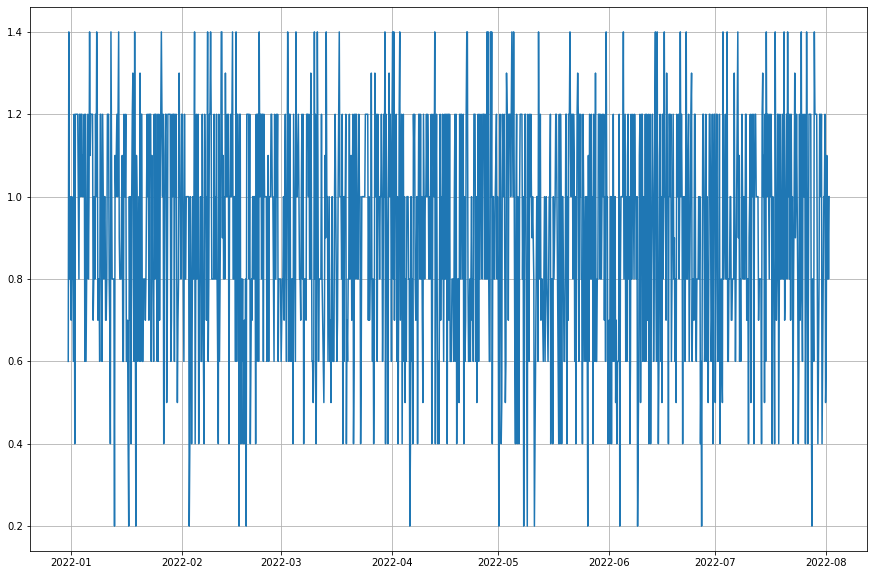

In [11]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df4['DP'])

Dicky Fuller test and checking Stationarity

In [15]:
result1 = adfuller(df2['Permeate flow'])
result2 = adfuller(df3['Salt Rejection'])
result3 = adfuller(df4['DP'])

print("ADF Statistic for 'Permeate flow': %f" %result1[0])
print("ADF Statistic for 'DP': %f" %result2[0])
print("ADF Statistic for 'Salt Rejection': %f" %result3[0])

print("p-value for 'Permeate flow': %f" %result1[1])
print("p-value for 'DP': %f" %result2[1])
print("p-value for'Salt Rejection': %f" %result3[1])




ADF Statistic for 'Permeate flow': -9.315606
ADF Statistic for 'DP': -27.196851
ADF Statistic for 'Salt Rejection': -34.934587
p-value for 'Permeate flow': 0.000000
p-value for 'DP': 0.000000
p-value for'Salt Rejection': 0.000000


In [18]:
print("Critical Values for 'Permeate flow':")
for key, value in result1[4].items():
    print("\t%s: %.3f" %(key, value))

if result1[0] < result1[4]["5%"]:
    print("At 5% level of significance - Reject H0 - 'Permeate flow' Time series is stationary")
else:
    print("At 5% level of significance - Failed to reject H0 - 'Permeate flow'  Time series is non-stationary")




print("Critical Values for 'Salt Rejection':")
for key, value in result2[4].items():
    print("\t%s: %.3f" %(key, value))

if result2[0] < result2[4]["5%"]:
    print("At 5% level of significance - Reject H0 - 'Salt Rejection' Time series is stationary")
else:
    print("At 5% level of significance - Failed to reject H0 - 'Salt Rejection' Time series is non-stationary")


print("Critical Values for 'DP':")
for key, value in result3[4].items():
    print("\t%s: %.3f" %(key, value))

if result3[0] < result3[4]["5%"]:
    print("At 5% level of significance - Reject H0 - 'DP' Time series is stationary")
else:
    print("At 5% level of significance - Failed to reject H0 -  'DP' Time series is non-stationary")




Critical Values for 'Permeate flow':
	1%: -3.436
	5%: -2.864
	10%: -2.568
At 5% level of significance - Reject H0 - 'Permeate flow' Time series is stationary
Critical Values for 'Salt Rejection':
	1%: -3.436
	5%: -2.864
	10%: -2.568
At 5% level of significance - Reject H0 - 'Salt Rejection' Time series is stationary
Critical Values for 'DP':
	1%: -3.436
	5%: -2.864
	10%: -2.568
At 5% level of significance - Reject H0 - 'DP' Time series is stationary


Visualizing Trend,Seasonality and Noise with seasonal_decompose library from statsmodels 

In [20]:
result_add1 = seasonal_decompose(x=df2['Permeate flow'], model='additive',freq=6)
result_add2= seasonal_decompose(x=df3['Salt Rejection'], model='additive',freq=6)
result_add3 = seasonal_decompose(x=df4['DP'], model='additive',freq=6)

<ipython-input-20-9631937dc710>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result_add1 = seasonal_decompose(x=df2['Permeate flow'], model='additive',freq=6)
<ipython-input-20-9631937dc710>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result_add2= seasonal_decompose(x=df3['Salt Rejection'], model='additive',freq=6)
<ipython-input-20-9631937dc710>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result_add3 = seasonal_decompose(x=df4['DP'], model='additive',freq=6)


Trend

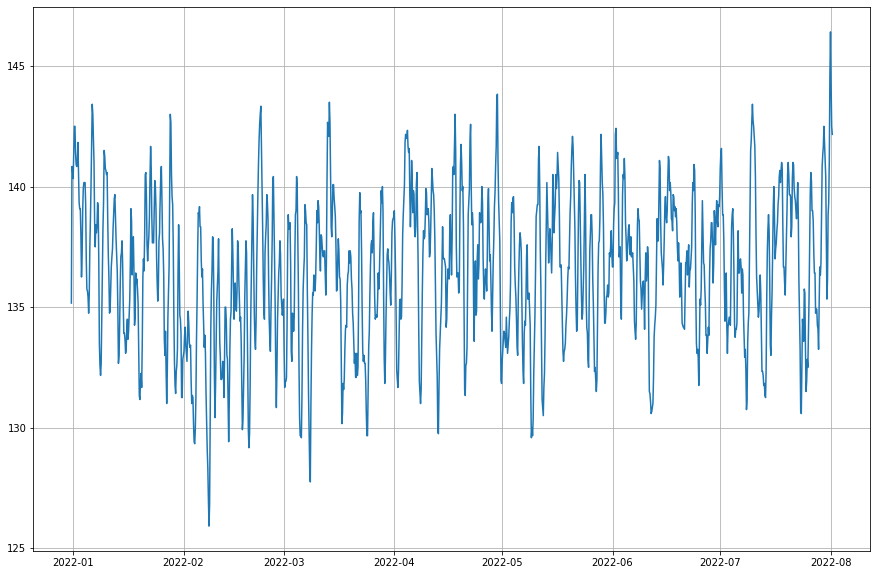

In [21]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(result_add1.trend)


    

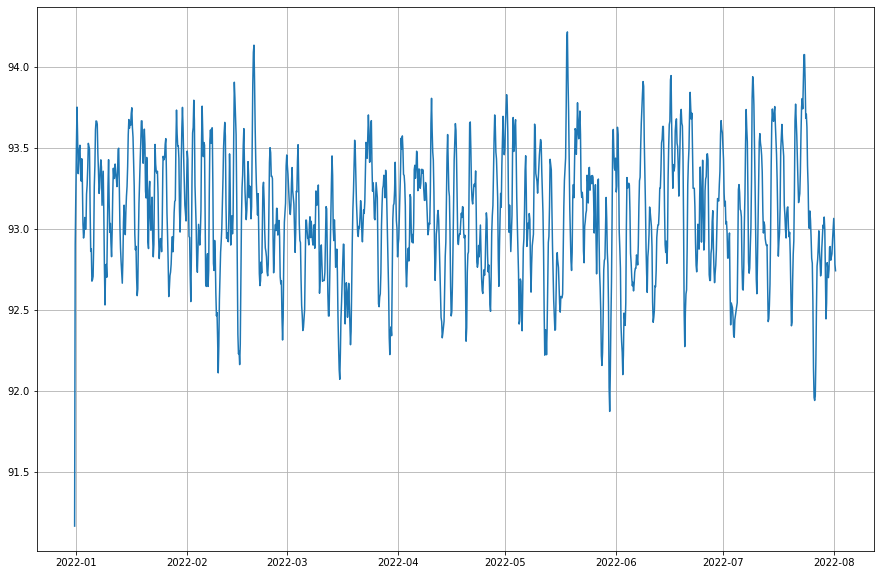

In [22]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(result_add2.trend)


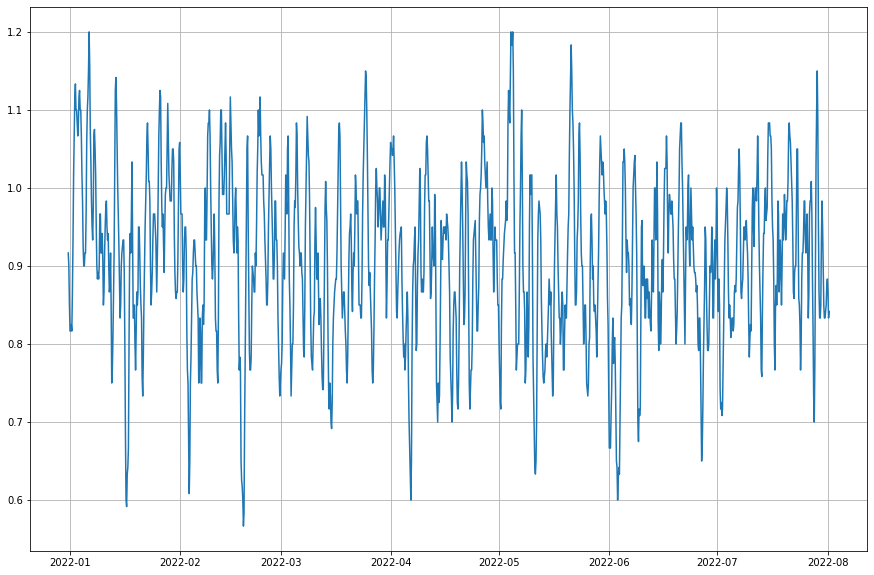

In [23]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(result_add3.trend)


Seasonality

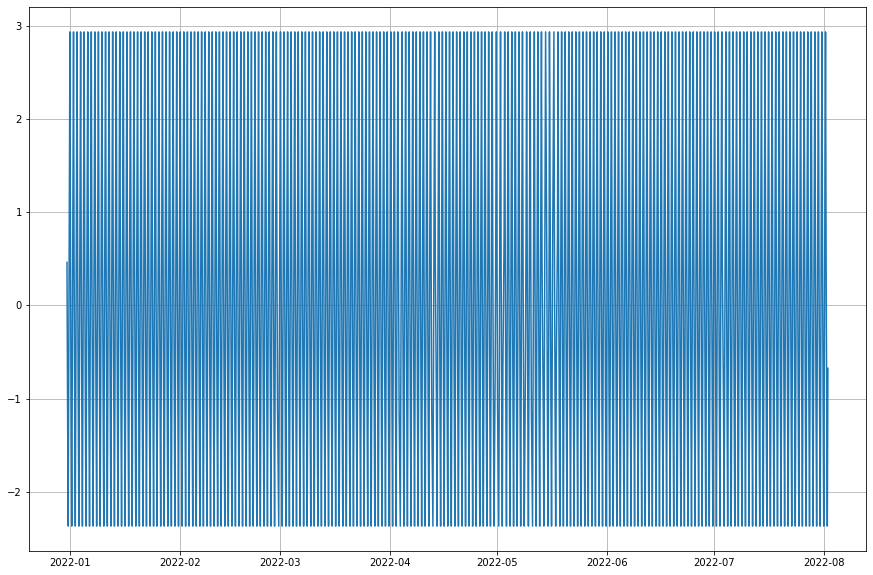

In [24]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(result_add1.seasonal)

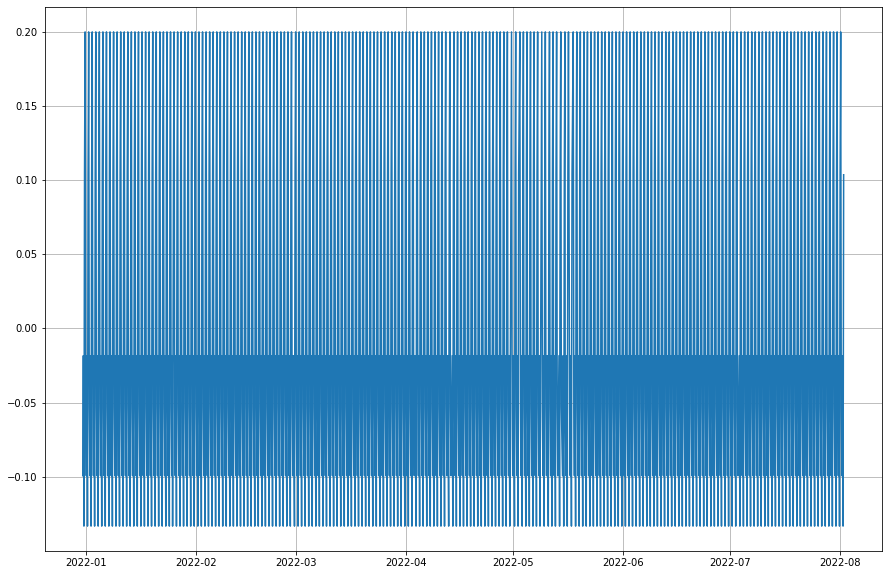

In [25]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(result_add2.seasonal)

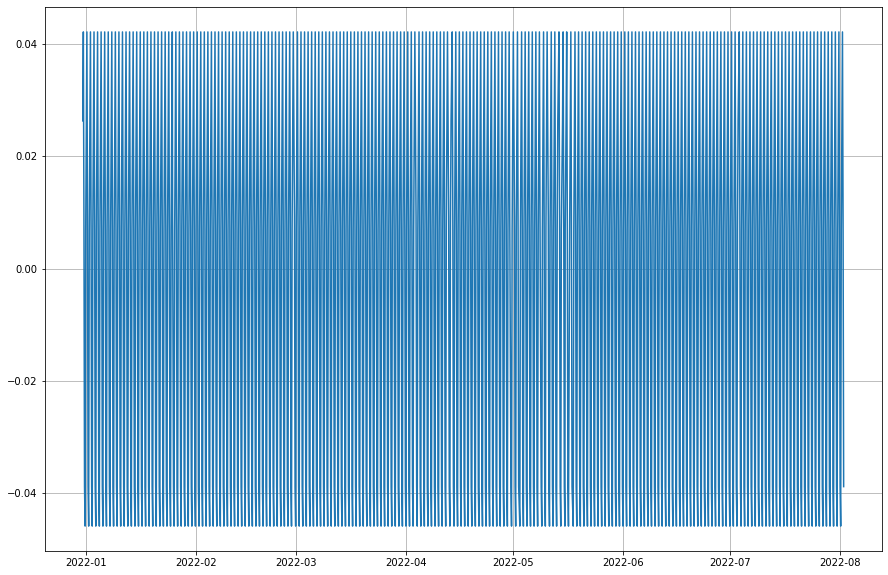

In [27]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(result_add3.seasonal)

Noise/Residual

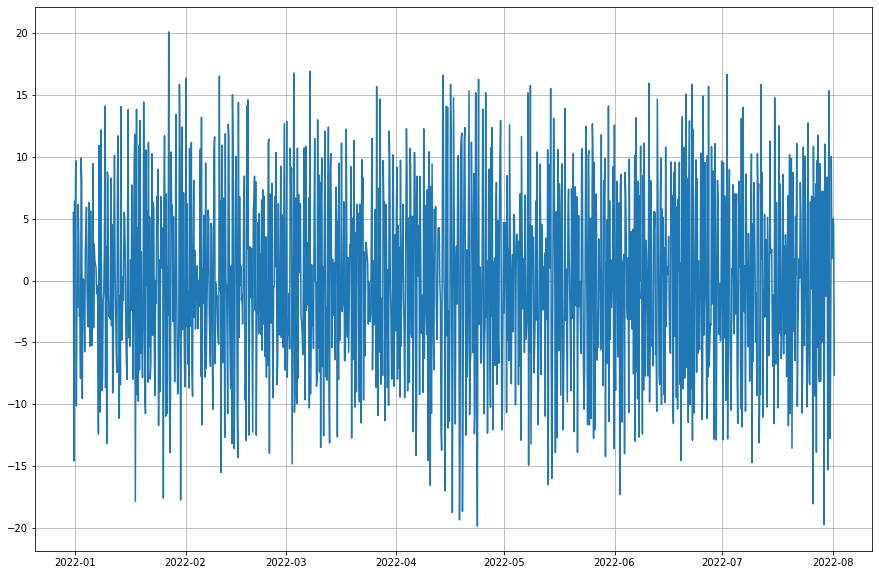

In [28]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(result_add1.resid)

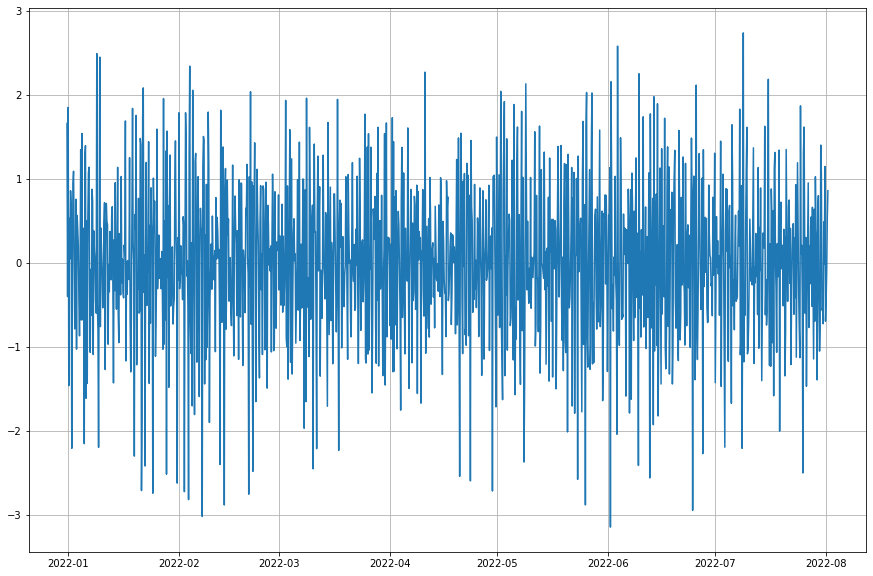

In [29]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(result_add2.resid)

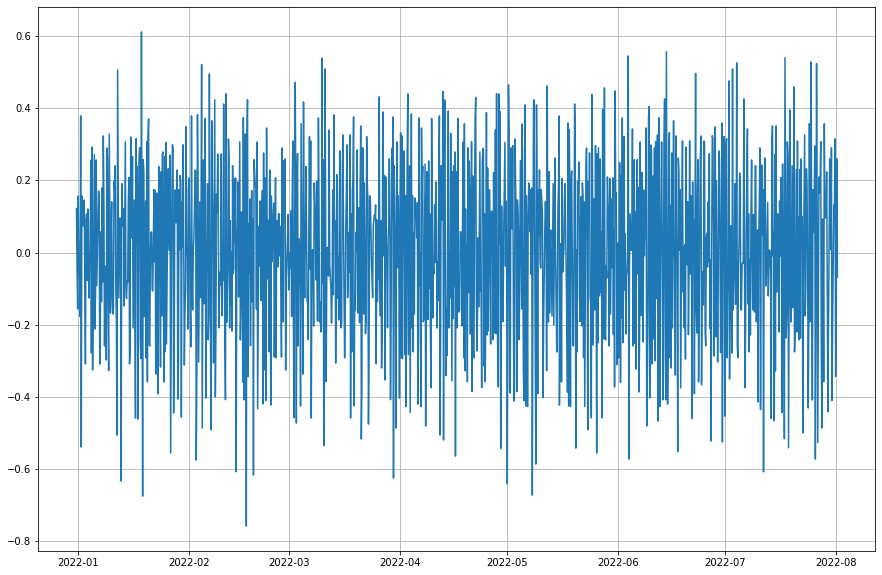

In [31]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(result_add3.resid)


Detrending by Fitting a polynomial of order 2

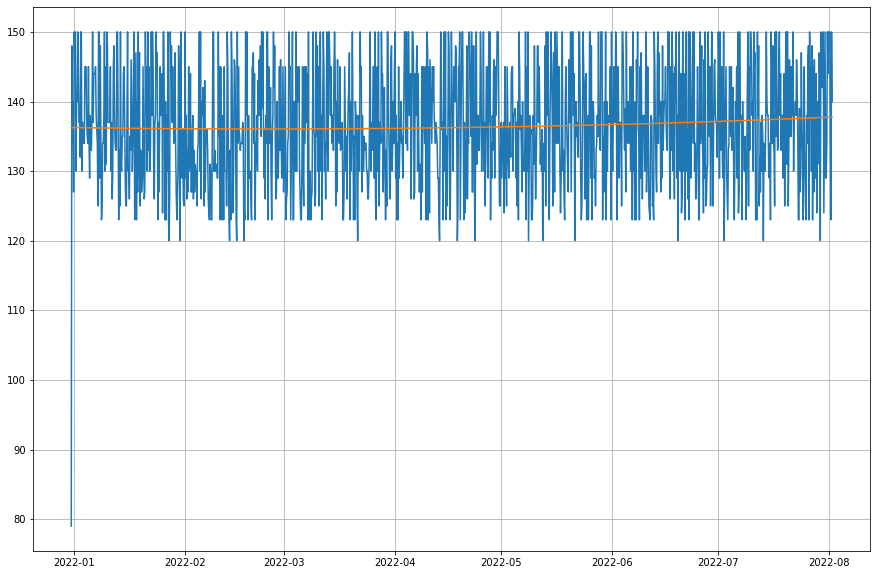

In [32]:
order = 2
coef = np.polyfit(np.arange(len(df2['Permeate flow'])),
                  df2['Permeate flow'].values.ravel(),
                  order)


poly_mdl = np.poly1d(coef)
poly_mdl
trend = pd.Series(data = poly_mdl(np.arange(len(df2['Permeate flow']))),
                  index = df2.index)

plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df2['Permeate flow'])
plt.plot(trend)
plt.show()


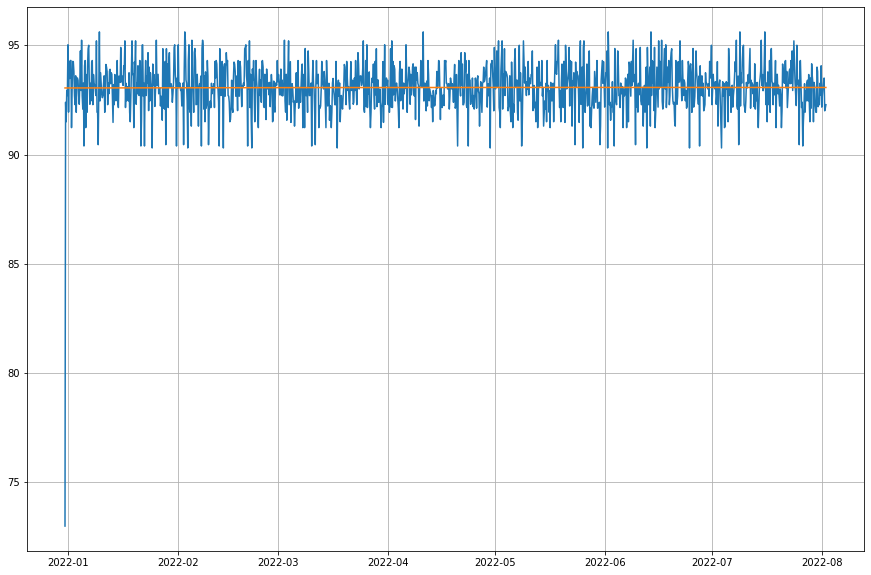

In [39]:
order = 2
coef2= np.polyfit(np.arange(len(df3['Salt Rejection'])),
                  df3['Salt Rejection'].values.ravel(),
                  order)
poly_mdl2= np.poly1d(coef2)
poly_mdl2
trend2= pd.Series(data = poly_mdl2(np.arange(len(df3['Salt Rejection']))),
                  index = df3.index)
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df3['Salt Rejection'])
plt.plot(trend2)
plt.show()


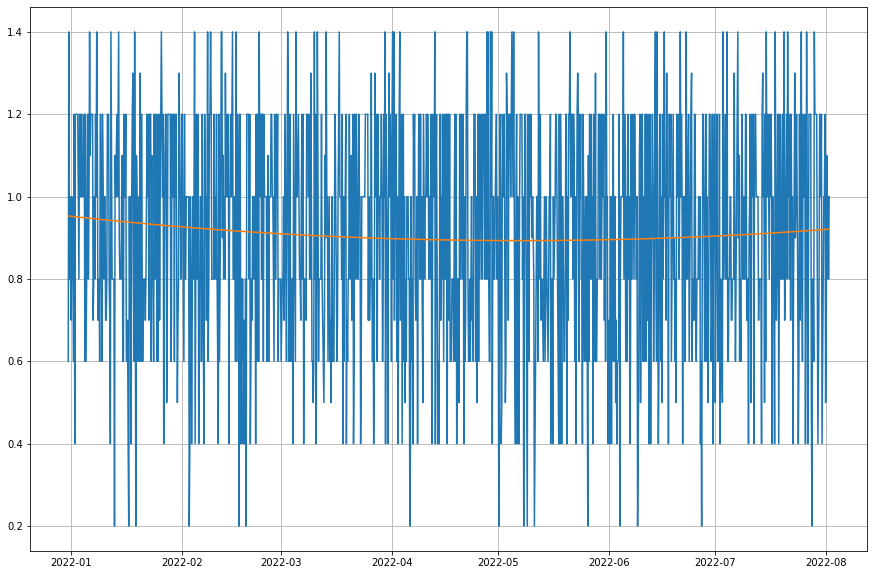

In [38]:
order = 2
coef3= np.polyfit(np.arange(len(df4['DP'])),
                  df4['DP'].values.ravel(),
                  order)
poly_mdl3= np.poly1d(coef3)
poly_mdl3
trend3= pd.Series(data = poly_mdl3(np.arange(len(df4['DP']))),
                  index = df4.index)
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df4['DP'])
plt.plot(trend3)
plt.show()


Detrending from original data

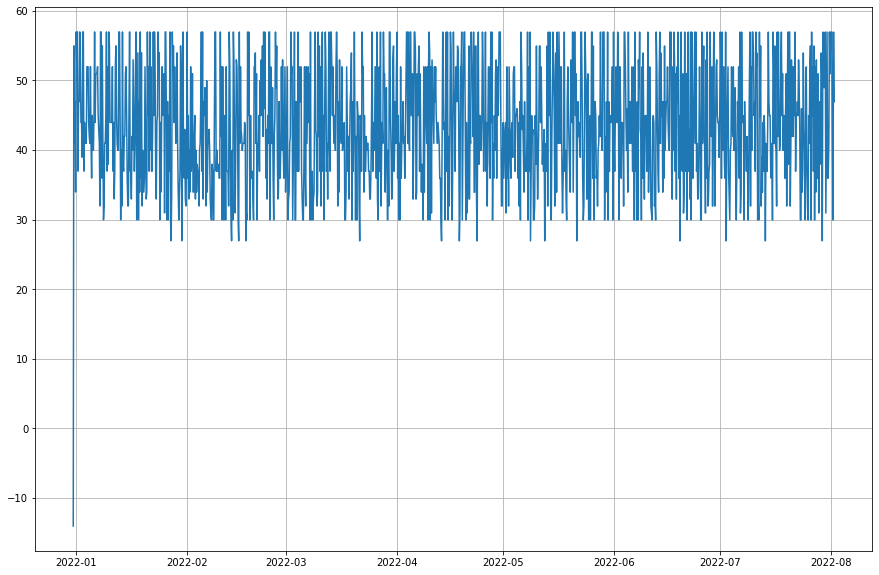

In [40]:
detrended = df2['Permeate flow']- trend
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(detrended)


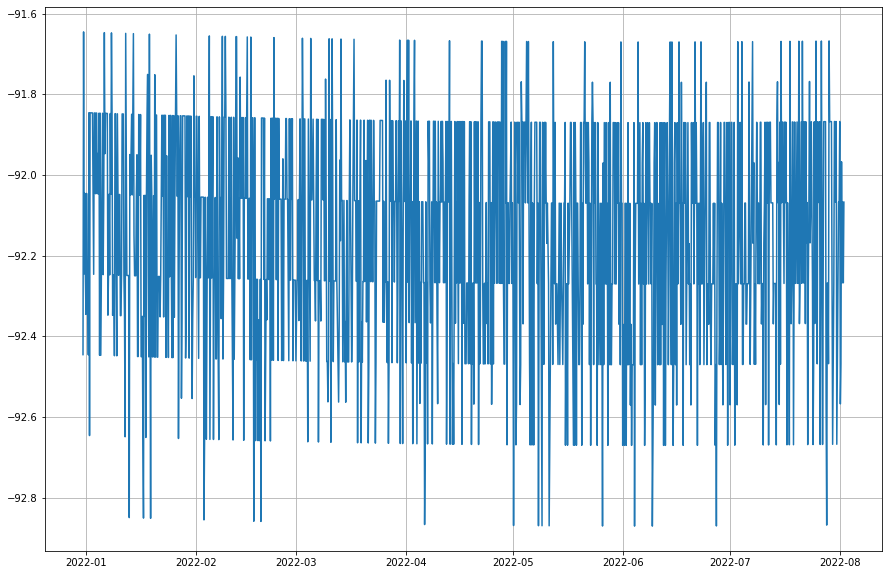

In [47]:
detrended3= df4['DP']- trend3
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(detrended)

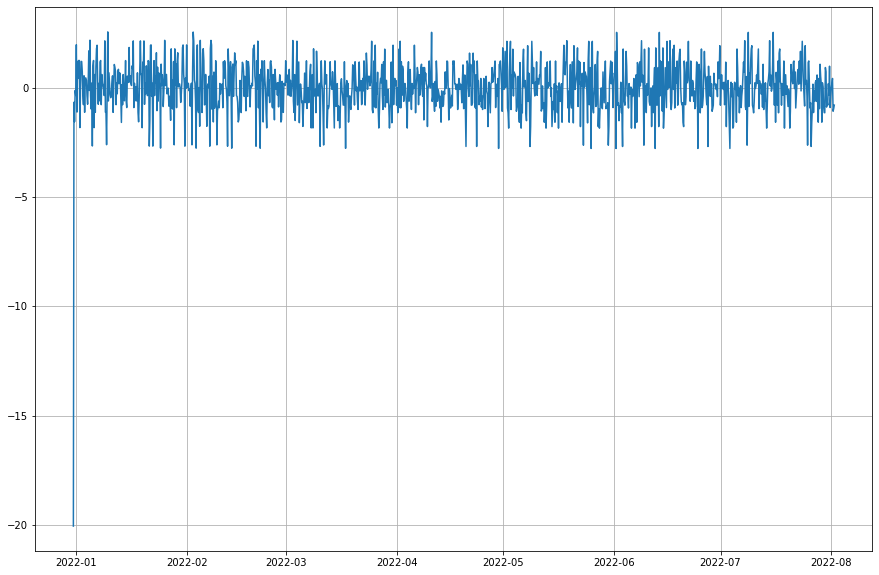

In [45]:
detrended1= df3['Salt Rejection']- trend2
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(detrended1)


Seasonal Components between two day

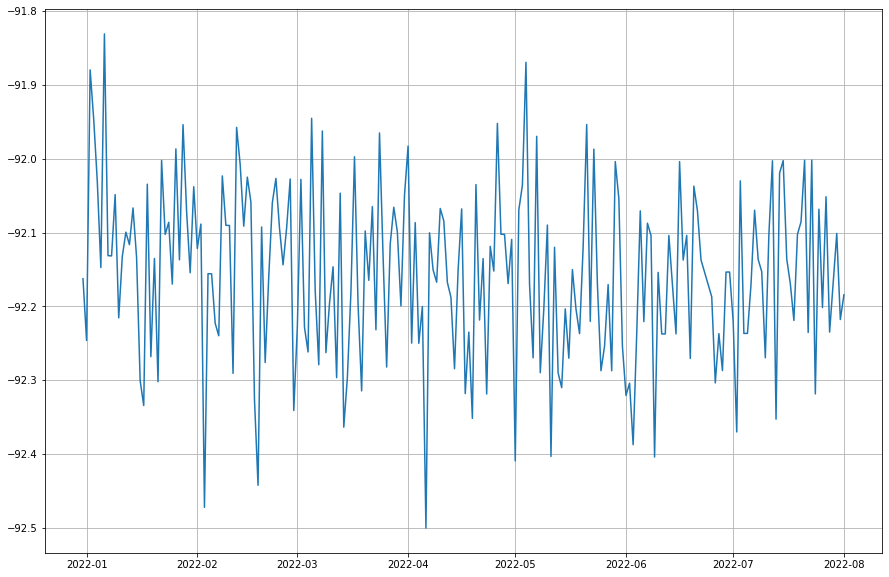

In [48]:
seasonal2 = detrended.groupby(by = detrended.index.date).mean()
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(seasonal2)

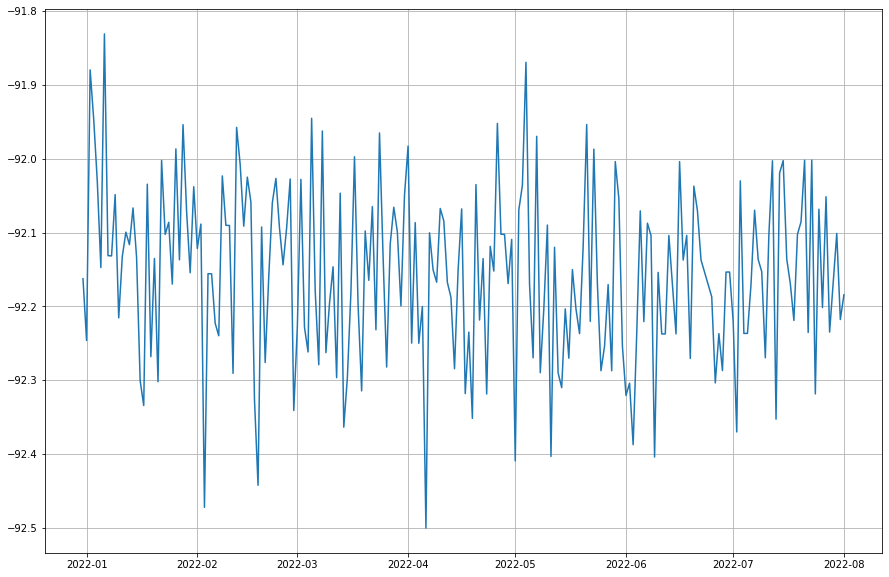

In [49]:
seasonal1= detrended.groupby(by = detrended1.index.date).mean()
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(seasonal1)

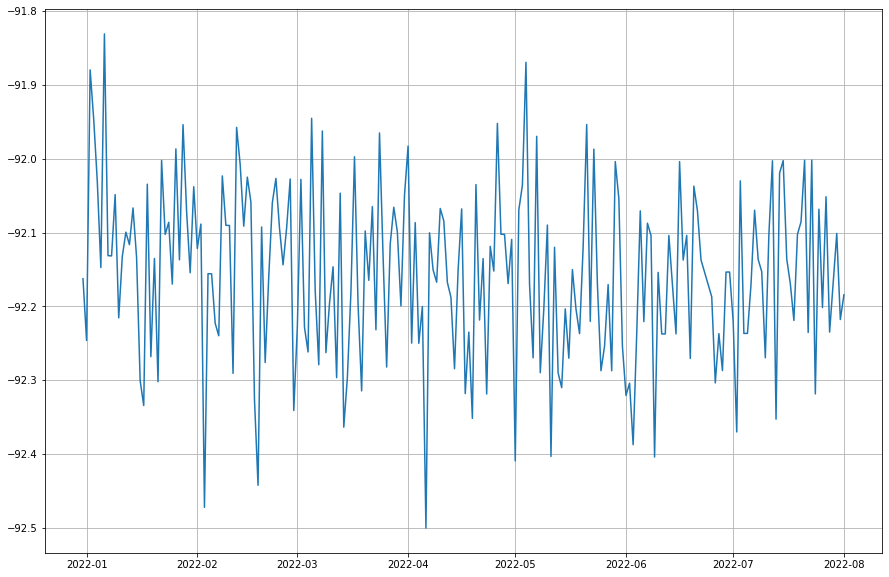

In [50]:
seasonal3 = detrended.groupby(by = detrended3.index.date).mean()
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(seasonal3)

Finding the order of the AR term (p)

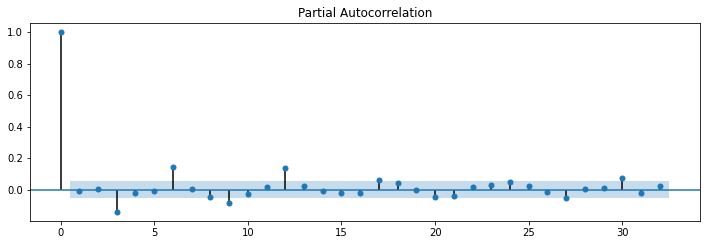

In [57]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df2['Permeate flow'].dropna(),ax=ax2)

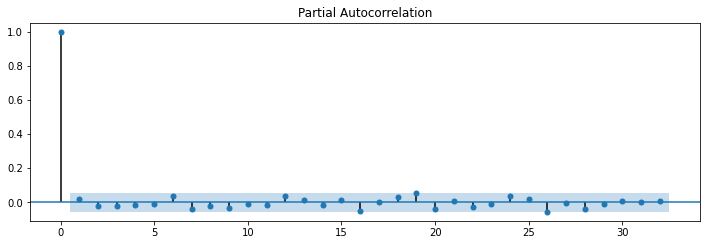

In [58]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df3['Salt Rejection'].dropna(),ax=ax2)

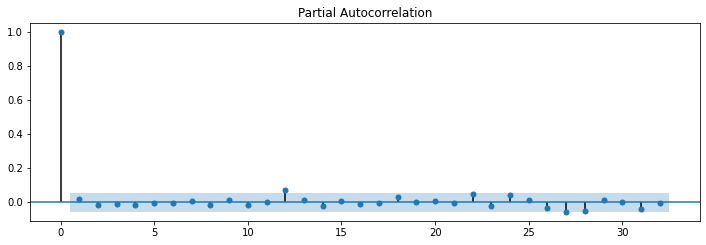

In [59]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df4['DP'].dropna(),ax=ax2)

Considering p=1 for all

Find the order of the MA term (q)

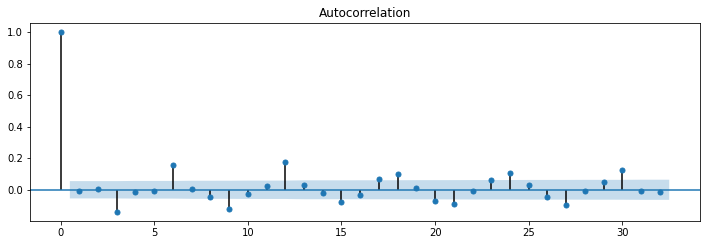

In [60]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df2['Permeate flow'].dropna(),ax=ax1)

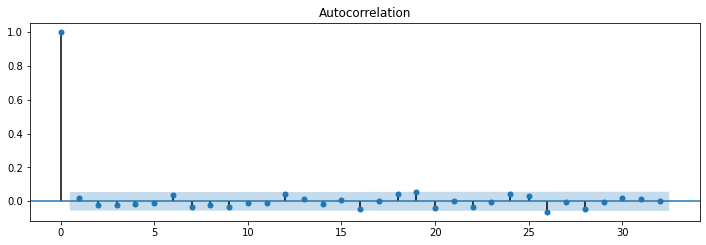

In [61]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df3['Salt Rejection'].dropna(),ax=ax1)

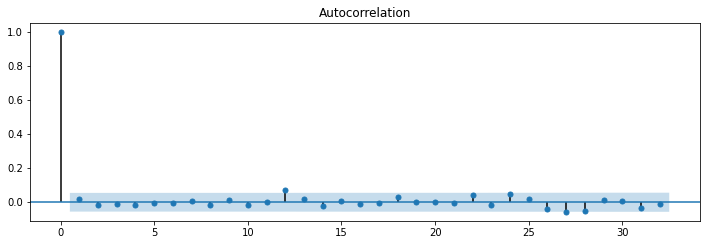

In [62]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df4['DP'].dropna(),ax=ax1)

Considering q=1 for all

In [56]:
trainp,testp= df2[:int(len(df2)*0.6)], df2[int(len(df2)*0.6):]
print(f"Train {len(trainp)} \n Test {len(testp)}")

trains,tests= df3[:int(len(df3)*0.6)], df3[int(len(df3)*0.6):]
#@print(f"Train {len(trains)} \n Test {len(tests)}")

traind,testd = df4[:int(len(df4)*0.6)], df4[int(len(df4)*0.6):]


Train 762 
 Test 508


In [70]:
model1 = sm.tsa.statespace.SARIMAX(df2['Permeate flow'], order = (1,0,1), seasonal_order = (1,0,1,6))
fit1 = model1.fit()
pred1 = fit1.predict(start = 700, end = 1207)

model2 = sm.tsa.statespace.SARIMAX(df3['Salt Rejection'], order = (1,0,1), seasonal_order = (1,0,1,6))
fit2 = model2.fit()
pred2= fit2.predict(start = 700, end = 1207)

model3 = sm.tsa.statespace.SARIMAX(df4['DP'], order = (1,0,1), seasonal_order = (1,0,1,6))
fit3= model3.fit()
pred3 = fit3.predict(start = 700, end = 1207)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.


Rmse

In [83]:
from sklearn.metrics import mean_squared_error
from math import sqrt
np.sqrt(mean_squared_error(testp['Permeate flow'],pred1))


9.304759241277216

In [84]:
np.sqrt(mean_squared_error(tests['Salt Rejection'],pred2))

1.122278598647864

In [85]:
np.sqrt(mean_squared_error(testd['DP'],pred3))

0.2862741404605946

Mape

In [79]:
from sklearn.metrics import mean_absolute_percentage_error as mape

In [80]:
mape(tests['Salt Rejection'],pred2)

0.009672181253094275

In [81]:
mape(testd['DP'],pred3)

0.35313160350574246

In [82]:
mape(testp['Permeate flow'],pred1)

0.057471277673683166

In [90]:
forecast1 = fit1.predict(start = 1000, end = 1200)
forecast2 = fit2.predict(start = 1000, end = 1200)
forecast3 = fit3.predict(start = 1000, end = 1200)

Actual1=pd.DataFrame(df2[1000:1201])
Actual2=pd.DataFrame(df3[1000:1201])
Actual3=pd.DataFrame(df4[1000:1201])

df5=pd.DataFrame(forecast1)
df5["Original_Permeate flow"]=Actual1['Permeate flow']


df6=pd.DataFrame(forecast2)
df6["Original_Salt Rejection"]=Actual2['Salt Rejection']

df7=pd.DataFrame(forecast3)
df7["Original_DP"]=Actual3['DP']

Plotting 

In [96]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df6.index,
    y=df6['predicted_mean'],
    name="Predicted"
))

fig.add_trace(go.Scatter(
    x=df6.index,
    y=df6['Original_Salt Rejection'],
    name="Original"
))

fig.update_layout(xaxis_title="Time", yaxis_title="Salt Rejection", title="Salt Rejection vs Time")

In [99]:
fig2= go.Figure()

fig2.add_trace(go.Scatter(
    x=df5.index,
    y=df5['predicted_mean'],
    name="Predicted"
))

fig2.add_trace(go.Scatter(
    x=df5.index,
    y=df5['Original_Permeate flow'],
    name="Original"
))

fig2.update_layout(xaxis_title="Time", yaxis_title="Permeate_flow", title="Permeate_flow vs Time")

In [102]:
df7.columns

Index(['predicted_mean', 'Original_DP'], dtype='object')

In [104]:
fig4= go.Figure()

fig4.add_trace(go.Scatter(
    x=df7.index,
    y=df7['predicted_mean'],
    name="Predicted"
))

fig4.add_trace(go.Scatter(
    x=df7.index,
    y=df7['Original_DP'],
    name="Original"
))

fig4.update_layout(xaxis_title="Time", yaxis_title="DP", title="DP vs Time")